In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv('Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   lower        1816 non-null    object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [59]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d %H:%M')

In [60]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
df.isna().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
# T是转置 any任何一个空值 用df框起来，变成数据框
#Nan_row=df[df.isna().T.any()]
#Nan_row


In [63]:
# 1.data cleaning
df=df.drop(['lower'],axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [64]:
#删除所有的空值包括行和列的空值df.dropna()
#删除所有row df.dropna(axis=0, how='any', inplace=True)
#删除所有column df.dropna(axis=1, how='any', inplace=True)
#删除某列subset
df=df.dropna(subset=['CustomerID'])
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
df.duplicated().sum()

5225

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
# 2.data analyse 
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Spain'),
  Text(4, 0, 'Belgium')])

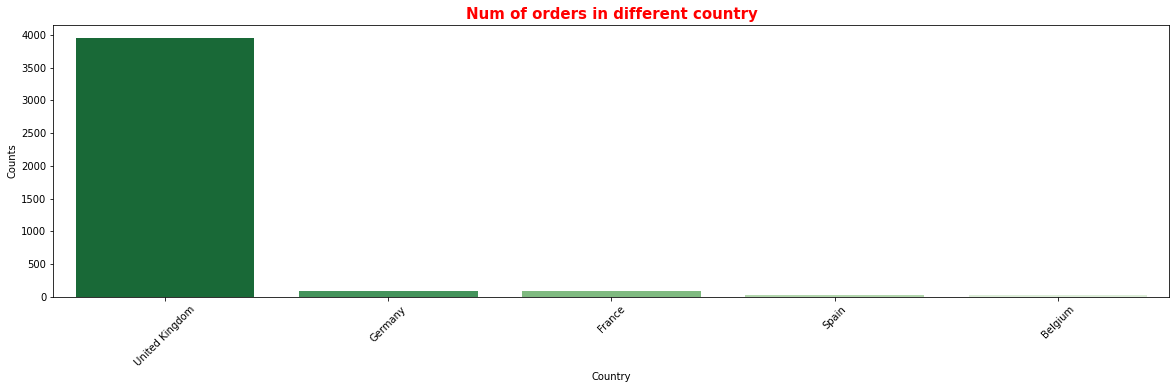

In [68]:
order_unique_cus=df.drop_duplicates(['CustomerID'],keep='first',inplace=False)
order_sum=order_unique_cus.groupby(by='Country').UnitPrice.count()
order_sum=order_sum.sort_values(ascending=False).head(5)
plt.figure(figsize=(20,5))
sns.barplot(order_sum.index,order_sum.values,palette="Greens_r")           
plt.ylabel('Counts')
plt.title('Num of orders in different country',fontsize=15,color='r',fontweight='bold')
plt.xticks(rotation=45)

In [69]:
order_unique_cus.loc[order_unique_cus.Country=='United Kingdom'].shape[0]/order_unique_cus.shape[0]


0.903476669716377

conclusion:Since the main consumer group is the United Kingdom, and the purchasing habits of users in each country are different, the subsequent RFM analysis will only be analyzed for customers in the United Kingdom

In [70]:
#3.Analyse RFM of customers of UK
df.describe()


,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [71]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [72]:
# It show that when Quantity<0, InvoiceNo has been cancelled or Description is discount


In [73]:
# delete the quantity <0 in the column of Quantity
df.drop(df[df['Quantity']<0].index,inplace=True)


In [74]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [75]:
import datetime
#df['date']=df['InvoiceDate'].apply(lambda x: x.date)
df['date']=df['InvoiceDate'].dt.date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [76]:
#R: rencency F:frequency M:money
#df['M']=df['Quantity']*df['UnitPrice']
#rfm=pivot_table(index='CustomerID',values=['date','InvoiceNo','M'],aggfunc=['date':'max','InvoiceNo':'count','M':'sum'])
df['M']=df['UnitPrice']*df['Quantity']
df
                
                                              

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,M
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [77]:
rfm=df.groupby(['CustomerID']).agg({
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'M':'sum'
})



In [78]:
rfm

,InvoiceDate,InvoiceNo,M
CustomerID,,,
12346.0,2011-01-18 10:01:00,1,77183.60
12347.0,2011-12-07 15:52:00,182,4310.00
12348.0,2011-09-25 13:13:00,31,1797.24
12349.0,2011-11-21 09:51:00,73,1757.55
12350.0,2011-02-02 16:01:00,17,334.40
...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60
18281.0,2011-06-12 10:53:00,7,80.82
18282.0,2011-12-02 11:43:00,12,178.05


In [79]:
rfm.rename(columns={'InvoiceNo':'F'},inplace=True)
rfm

,InvoiceDate,F,M
CustomerID,,,
12346.0,2011-01-18 10:01:00,1,77183.60
12347.0,2011-12-07 15:52:00,182,4310.00
12348.0,2011-09-25 13:13:00,31,1797.24
12349.0,2011-11-21 09:51:00,73,1757.55
12350.0,2011-02-02 16:01:00,17,334.40
...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60
18281.0,2011-06-12 10:53:00,7,80.82
18282.0,2011-12-02 11:43:00,12,178.05


In [80]:
rfm['R']=(rfm.InvoiceDate.max()-rfm.InvoiceDate)/np.timedelta64(1,'D')
rfm
# imedelta64的参数是一个数字，用于表示单位数，以及日期/时间单位，
#如 (D)ay, (M)onth, (Y)ear, (h)ours, (m)inutes, 或者 (s)econds

,InvoiceDate,F,M,R
CustomerID,,,,
12346.0,2011-01-18 10:01:00,1,77183.60,325.117361
12347.0,2011-12-07 15:52:00,182,4310.00,1.873611
12348.0,2011-09-25 13:13:00,31,1797.24,74.984028
12349.0,2011-11-21 09:51:00,73,1757.55,18.124306
12350.0,2011-02-02 16:01:00,17,334.40,309.867361
...,...,...,...,...
18280.0,2011-03-07 09:52:00,10,180.60,277.123611
18281.0,2011-06-12 10:53:00,7,80.82,180.081250
18282.0,2011-12-02 11:43:00,12,178.05,7.046528


In [81]:
rfm1=rfm[['R','F','M']]
rfm1

,R,F,M
CustomerID,,,
12346.0,325.117361,1,77183.60
12347.0,1.873611,182,4310.00
12348.0,74.984028,31,1797.24
12349.0,18.124306,73,1757.55
12350.0,309.867361,17,334.40
...,...,...,...
18280.0,277.123611,10,180.60
18281.0,180.081250,7,80.82
18282.0,7.046528,12,178.05


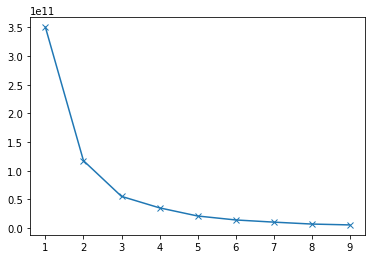

In [82]:
# 4. Analyse the RFM by KMEANS


SSE=[]
for k in range(1,10):
    estimator=KMeans(n_clusters=k)
    estimator.fit(rfm1)
    SSE.append(estimator.inertia_)
x=range(1,10)
plt.plot(x,SSE,'x-')
plt.show()
#x线的断点的形状 -是指solid line style 也可以是--,-.

In [83]:
# conclusion: 3 is elbow point, so i choose 3

In [91]:
rfm1 

         


,R,F,M
CustomerID,,,
12346.0,325.117361,1,77183.60
12347.0,1.873611,182,4310.00
12348.0,74.984028,31,1797.24
12349.0,18.124306,73,1757.55
12350.0,309.867361,17,334.40
...,...,...,...
18280.0,277.123611,10,180.60
18281.0,180.081250,7,80.82
18282.0,7.046528,12,178.05


In [ ]:
# fit by clusters 3 and add the column of cluster

In [98]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(rfm1)
rfm1['cluster']=kmeans.labels_
rfm1.sort_values(by='cluster')

,R,F,M,cluster
CustomerID,,,,
15299.0,66.938194,7,4507.01,0
16266.0,73.029167,61,861.89,0
16268.0,70.763889,45,667.65,0
16270.0,352.933333,54,1141.24,0
16271.0,2.003472,130,1404.64,0
...,...,...,...,...
17404.0,3.850000,198,31906.82,2
13694.0,3.137500,568,65039.62,2
16684.0,3.947222,277,66653.56,2


Text(0.5, 1.0, 'boxplot across R and Cluster')

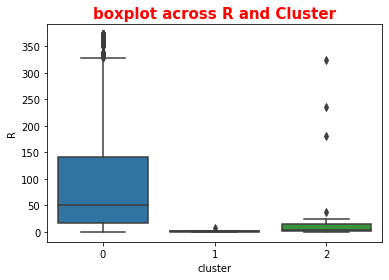

In [101]:
# R & Cluster
sns.boxplot(rfm1.cluster,rfm.R)
plt.title('boxplot across R and Cluster',fontsize=15,color='r',fontweight='bold')

In [121]:
rfm2=rfm[['R','F','M']]
quantile=rfm2.quantile(q=[0.25,0.5,0.75])
def Rscore(x,col):
    if x<=quantile[col][0.25]:
        return 1
    elif x<=quantile[col][0.5]:
        return 2
    elif x<=quantile[col][0.75]:
        return 3
    else:
        return 4

    
def FMScore(x,col):
    if x<=quantile[col][0.25]:
        return 4
    elif x<=quantile[col][0.5]:
        return 3
    elif x<=quantile[col][0.75]:
        return 2
    else:
        return 1
  

In [122]:
rfm2['r_score']=rfm2['R'].apply(Rscore,args=('R'))
rfm2['f_score']=rfm2['F'].apply(FMScore,args=('F'))
rfm2['m_score']=rfm2['M'].apply(FMScore,args=('M'))
rfm2

,R,F,M,r_score,f_score,m_score
CustomerID,,,,,,
12346.0,325.117361,1,77183.60,4,4,1
12347.0,1.873611,182,4310.00,1,1,1
12348.0,74.984028,31,1797.24,3,3,1
12349.0,18.124306,73,1757.55,2,2,1
12350.0,309.867361,17,334.40,4,4,3
...,...,...,...,...,...,...
18280.0,277.123611,10,180.60,4,4,4
18281.0,180.081250,7,80.82,4,4,4
18282.0,7.046528,12,178.05,1,4,4


In [123]:
rfm2['str_score']=rfm2['r_score'].apply(str)+rfm2['f_score'].apply(str)+rfm2['m_score'].apply(str)


In [124]:
rfm2


,R,F,M,r_score,f_score,m_score,str_score
CustomerID,,,,,,,
12346.0,325.117361,1,77183.60,4,4,1,441
12347.0,1.873611,182,4310.00,1,1,1,111
12348.0,74.984028,31,1797.24,3,3,1,331
12349.0,18.124306,73,1757.55,2,2,1,221
12350.0,309.867361,17,334.40,4,4,3,443
...,...,...,...,...,...,...,...
18280.0,277.123611,10,180.60,4,4,4,444
18281.0,180.081250,7,80.82,4,4,4,444
18282.0,7.046528,12,178.05,1,4,4,144


In [126]:
rfm2['rfm_total_score']=rfm2['r_score']+rfm2['f_score']+rfm2['m_score']
rfm2

,R,F,M,r_score,f_score,m_score,str_score,rfm_total_score
CustomerID,,,,,,,,
12346.0,325.117361,1,77183.60,4,4,1,441,9
12347.0,1.873611,182,4310.00,1,1,1,111,3
12348.0,74.984028,31,1797.24,3,3,1,331,7
12349.0,18.124306,73,1757.55,2,2,1,221,5
12350.0,309.867361,17,334.40,4,4,3,443,11
...,...,...,...,...,...,...,...,...
18280.0,277.123611,10,180.60,4,4,4,444,12
18281.0,180.081250,7,80.82,4,4,4,444,12
18282.0,7.046528,12,178.05,1,4,4,144,9


In [128]:
bins=rfm2['rfm_total_score'].quantile(q=[0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1])
bins[0] =0
labels = ['churn customer','maintain customers','develope customers','potentional customers','important maintaining customers','important keeping customers','important developing customers','important value customers']
rfm2['level'] = pd.cut(rfm2.rfm_total_score,bins,labels=labels)
rfm2

,R,F,M,r_score,f_score,m_score,str_score,rfm_total_score,level
CustomerID,,,,,,,,,
12346.0,325.117361,1,77183.60,4,4,1,441,9,important maintaining customers
12347.0,1.873611,182,4310.00,1,1,1,111,3,churn customer
12348.0,74.984028,31,1797.24,3,3,1,331,7,potentional customers
12349.0,18.124306,73,1757.55,2,2,1,221,5,maintain customers
12350.0,309.867361,17,334.40,4,4,3,443,11,important developing customers
...,...,...,...,...,...,...,...,...,...
18280.0,277.123611,10,180.60,4,4,4,444,12,important value customers
18281.0,180.081250,7,80.82,4,4,4,444,12,important value customers
18282.0,7.046528,12,178.05,1,4,4,144,9,important maintaining customers


In [133]:
import matplotlib.pyplot as plt

cus=rfm2.groupby('level').count().sort_values('R')



,R,F,M,r_score,f_score,m_score,str_score,rfm_total_score
level,,,,,,,,
important value customers,381,381,381,381,381,381,381,381
important developing customers,392,392,392,392,392,392,392,392
develope customers,412,412,412,412,412,412,412,412
maintain customers,429,429,429,429,429,429,429,429
important maintaining customers,460,460,460,460,460,460,460,460
important keeping customers,521,521,521,521,521,521,521,521
churn customer,828,828,828,828,828,828,828,828
potentional customers,916,916,916,916,916,916,916,916


Text(0.5, 0, 'Level')

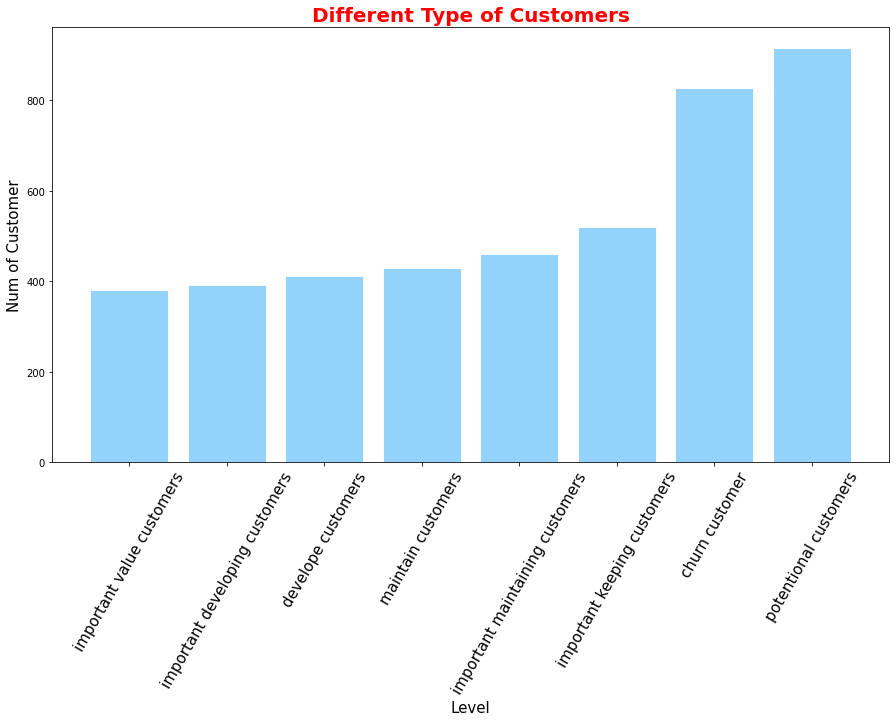

In [141]:
plt.figure(figsize=(15,8))
x=cus.index
y=cus.R
plt.bar(x,y,alpha=0.9, facecolor = 'lightskyblue', edgecolor = 'white')
plt.xticks(x,rotation=60,fontsize=15)
plt.title('Different Type of Customers',fontsize=20,color='r',fontweight='bold')
plt.ylabel('Num of Customer',fontsize=15)
plt.xlabel('Level',fontsize=15)

#Potentional customers accounts for most parts of customers.
